# Predicting COVID-19 Diagnosis Using Machine Learning Models: A Potential Tool for Early Identification and Isolation of Positive Cases

**1. Why is your proposal important in today's world?**

*My proposal, which involves predicting COVID-19 diagnosis based on symptoms using machine learning models, is important because it can help in the early identification and isolation of COVID-19 positive patients, which is crucial in controlling the spread of the virus. While COVID-19 may not be currently prevalent, it is always possible for the virus to return in the future. The proposed method can aid in reducing the burden on healthcare systems by enabling early detection of positive cases, leading to timely medical intervention and potentially reducing the severity of the disease. Therefore, this project can serve as a valuable tool in the future if COVID-19 returns.*

**2. How predicting a disease accurately can improve medical treatment?**

*Predicting a disease accurately can help in early detection and timely medical intervention, leading to better treatment outcomes. In the case of COVID-19, early identification of positive cases can enable healthcare providers to isolate and treat patients promptly, potentially reducing the severity of the disease and preventing further transmission. Accurate disease prediction can also help in the development of targeted treatments and therapies, as well as the allocation of healthcare resources.*



**3.what is the gap in the knowledge or how your proposed method can be helpful if required in the future for any other disease?**

*The proposed method can be helpful in predicting the diagnosis of other diseases if similar data is available. However, one potential gap in the knowledge is the limited availability of labeled data for training machine learning models. This can be addressed by collecting more data and developing better data collection and labeling methods. Additionally, the proposed method can be further improved by incorporating additional data sources, such as medical history and demographics, to enhance the accuracy of the prediction model.*




Importing required libraries 

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


First, we will load our dataset using Pandas' read_csv() function, and make a copy of the data to work with.

In [2]:
# Loading the raw data from the csv file
data_raw = pd.read_csv('/content/drive/MyDrive/data sets /corona_tested_006.csv')

# Creating a copy of the raw data to work with
data = data_raw.copy()


<ipython-input-2-acbf321e4f4f>:2: DtypeWarning: Columns (2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  data_raw = pd.read_csv('/content/drive/MyDrive/data sets /corona_tested_006.csv')


Next, we will explore our dataset to get a better understanding of its structure and contents. 

In [3]:
data.head() 

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


display the column data types and missing values

In [4]:
data.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [5]:
data.describe(include = 'all')  

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
count,278848.000000,278848,278848,278848,278848,278848,278848,278848,278848,278848,278848
unique,NaN,51,5,5,5,5,5,3,3,3,3
top,NaN,20-04-2020,False,False,False,False,False,negative,None,female,Other
freq,NaN,10921,127531,137774,212584,212842,212326,260227,127320,130158,242741
mean,139424.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,80496.628269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,69712.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,139424.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,209136.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


display 10 random rows from the dataset

In [6]:
data.sample(10)   


,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
211719,211720,21-04-2020,False,False,False,False,False,negative,None,female,Other
213537,213538,21-04-2020,False,False,False,False,False,negative,None,male,Other
200071,200072,20-04-2020,False,False,False,False,False,negative,None,female,Other
41720,41721,27-03-2020,FALSE,FALSE,FALSE,FALSE,FALSE,negative,No,female,Other
244847,244848,25-04-2020,False,False,False,False,False,negative,None,female,Other
193900,193901,19-04-2020,False,False,False,False,False,negative,None,female,Other
193044,193045,19-04-2020,False,False,False,False,False,negative,None,female,Other
142059,142060,13-04-2020,False,False,False,False,False,negative,No,male,Other
70936,70937,01-04-2020,FALSE,FALSE,False,False,False,negative,No,female,Other
160950,160951,15-04-2020,False,False,False,False,False,negative,None,female,Other


In [7]:
data.shape

(278848, 11)

Checking unique values in Test_date column

In [8]:
data['Test_date'].unique()

array(['11-03-2020', '12-03-2020', '13-03-2020', '14-03-2020',
       '15-03-2020', '16-03-2020', '17-03-2020', '18-03-2020',
       '19-03-2020', '20-03-2020', '21-03-2020', '22-03-2020',
       '23-03-2020', '24-03-2020', '25-03-2020', '26-03-2020',
       '27-03-2020', '28-03-2020', '29-03-2020', '30-03-2020',
       '31-03-2020', '01-04-2020', '02-04-2020', '03-04-2020',
       '04-04-2020', '05-04-2020', '06-04-2020', '07-04-2020',
       '08-04-2020', '09-04-2020', '10-04-2020', '11-04-2020',
       '12-04-2020', '13-04-2020', '14-04-2020', '15-04-2020',
       '16-04-2020', '17-04-2020', '18-04-2020', '19-04-2020',
       '20-04-2020', '21-04-2020', '22-04-2020', '23-04-2020',
       '24-04-2020', '25-04-2020', '26-04-2020', '27-04-2020',
       '28-04-2020', '29-04-2020', '30-04-2020'], dtype=object)

In [9]:
data['Test_date']

0         11-03-2020
1         11-03-2020
2         11-03-2020
3         11-03-2020
4         11-03-2020
             ...    
278843    30-04-2020
278844    30-04-2020
278845    30-04-2020
278846    30-04-2020
278847    30-04-2020
Name: Test_date, Length: 278848, dtype: object

test date in the object format converting into date format 

In [10]:
data["Test_date"] = pd.to_datetime(data["Test_date"], format="%d-%m-%Y")

checking unique values in Cough_symptoms

In [11]:
data['Cough_symptoms'].unique()

array(['TRUE', 'FALSE', 'None', False, True], dtype=object)

none counts in Cough_symptoms

In [12]:
none_count = data['Cough_symptoms'].value_counts()['None']
none_count

252

none count is 252 which negligible we can remove the rows

In [13]:
data = data[data['Cough_symptoms'] != 'None']

checking the shape after cleaning the none values from Cough_symptoms before the shape was (278848, 11) 

In [14]:
data.shape

(278596, 11)

creating a function to convert TRUE and FALSE to True and False

In [15]:
def to_boolean(value):
    if value == 'TRUE':
        return True
    elif value == 'FALSE':
        return False
    else:
        return value

In [16]:
data['Cough_symptoms'] = data['Cough_symptoms'].apply(to_boolean)

In [17]:
data['Cough_symptoms'].describe

<bound method NDFrame.describe of 0          True
1         False
2         False
3          True
4          True
          ...  
278843    False
278844    False
278845    False
278846    False
278847    False
Name: Cough_symptoms, Length: 278596, dtype: bool>

In [18]:
data['Fever'].unique()

array(['FALSE', 'TRUE', 'None', False, True], dtype=object)

In [19]:
none_count = data['Fever'].value_counts()['None']
none_count

2

none count is 2 which negligible we can remove the rows

In [20]:
data = data[data['Fever'] != 'None']

In [21]:
data['Fever'] = data['Fever'].apply(to_boolean)

<ipython-input-21-4d63fbfc0b4f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Fever'] = data['Fever'].apply(to_boolean)


In [22]:
data['Fever'].describe

<bound method NDFrame.describe of 0         False
1          True
2          True
3         False
4         False
          ...  
278843    False
278844    False
278845    False
278846    False
278847    False
Name: Fever, Length: 278594, dtype: bool>

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278594 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Ind_ID               278594 non-null  int64         
 1   Test_date            278594 non-null  datetime64[ns]
 2   Cough_symptoms       278594 non-null  bool          
 3   Fever                278594 non-null  bool          
 4   Sore_throat          278594 non-null  object        
 5   Shortness_of_breath  278594 non-null  object        
 6   Headache             278594 non-null  object        
 7   Corona               278594 non-null  object        
 8   Age_60_above         278594 non-null  object        
 9   Sex                  278594 non-null  object        
 10  Known_contact        278594 non-null  object        
dtypes: bool(2), datetime64[ns](1), int64(1), object(7)
memory usage: 21.8+ MB


In [24]:
data['Sore_throat'].unique()

array(['TRUE', 'FALSE', False, True], dtype=object)

In [25]:
data['Sore_throat'] = data['Sore_throat'].apply(to_boolean)

In [26]:
data['Sore_throat'].unique()

array([ True, False])

In [27]:
data['Sore_throat'].describe

<bound method NDFrame.describe of 0          True
1         False
2         False
3         False
4         False
          ...  
278843    False
278844    False
278845    False
278846    False
278847    False
Name: Sore_throat, Length: 278594, dtype: bool>

In [28]:
data['Shortness_of_breath'].unique()

array(['FALSE', 'TRUE', False, True], dtype=object)

In [29]:
data['Shortness_of_breath'] = data['Shortness_of_breath'].apply(to_boolean)

In [30]:
data['Shortness_of_breath'].describe

<bound method NDFrame.describe of 0         False
1         False
2         False
3         False
4         False
          ...  
278843    False
278844    False
278845    False
278846    False
278847    False
Name: Shortness_of_breath, Length: 278594, dtype: bool>

In [31]:
data['Headache'].unique()

array(['FALSE', 'TRUE', False, True], dtype=object)

In [32]:
data['Headache'] = data['Headache'].apply(to_boolean)

In [33]:
data['Headache'].describe

<bound method NDFrame.describe of 0         False
1         False
2         False
3         False
4         False
          ...  
278843    False
278844    False
278845    False
278846    False
278847    False
Name: Headache, Length: 278594, dtype: bool>

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278594 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Ind_ID               278594 non-null  int64         
 1   Test_date            278594 non-null  datetime64[ns]
 2   Cough_symptoms       278594 non-null  bool          
 3   Fever                278594 non-null  bool          
 4   Sore_throat          278594 non-null  bool          
 5   Shortness_of_breath  278594 non-null  bool          
 6   Headache             278594 non-null  bool          
 7   Corona               278594 non-null  object        
 8   Age_60_above         278594 non-null  object        
 9   Sex                  278594 non-null  object        
 10  Known_contact        278594 non-null  object        
dtypes: bool(5), datetime64[ns](1), int64(1), object(4)
memory usage: 16.2+ MB


checking unique columns in the corona column

In [35]:
data['Corona'].unique()

array(['negative', 'positive', 'other'], dtype=object)

In [36]:
other_count = data['Corona'].value_counts()['other']
other_count

3892

deleting the 'other' as it may affect our mashine learning model the count is negligible so i prefer droping the rows

In [37]:
data = data[data['Corona'] != 'other']

In [38]:
data['Age_60_above'].unique()

array(['None', 'No', 'Yes'], dtype=object)

In [39]:
none_count = data['Age_60_above'].value_counts()['None']
none_count

125659

In [40]:
data.shape

(274702, 11)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274702 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Ind_ID               274702 non-null  int64         
 1   Test_date            274702 non-null  datetime64[ns]
 2   Cough_symptoms       274702 non-null  bool          
 3   Fever                274702 non-null  bool          
 4   Sore_throat          274702 non-null  bool          
 5   Shortness_of_breath  274702 non-null  bool          
 6   Headache             274702 non-null  bool          
 7   Corona               274702 non-null  object        
 8   Age_60_above         274702 non-null  object        
 9   Sex                  274702 non-null  object        
 10  Known_contact        274702 non-null  object        
dtypes: bool(5), datetime64[ns](1), int64(1), object(4)
memory usage: 16.0+ MB


In [42]:
data['Sex'].unique()

array(['None', 'male', 'female'], dtype=object)

In [43]:
none_count = data['Sex'].value_counts()['None']
none_count

19034

replacing the none value with mode

In [44]:
# replace "None" with the modez
mode = data['Sex'].mode()[0]
data['Sex'] = data['Sex'].replace("None", mode)

In [45]:
none_count = data['Age_60_above'].value_counts()['None']
none_count

125659

In [46]:
data['Sex'].unique()

array(['female', 'male'], dtype=object)

In [47]:
data['Known_contact'].unique()

array(['Abroad', 'Contact with confirmed', 'Other'], dtype=object)

In [48]:
val_count = data['Known_contact'].value_counts()['Other']
val_count

239167

In [49]:
val_count = data['Known_contact'].value_counts()['Abroad']
val_count

25068

In [50]:
val_count = data['Known_contact'].value_counts()['Contact with confirmed']
val_count

10467

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274702 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Ind_ID               274702 non-null  int64         
 1   Test_date            274702 non-null  datetime64[ns]
 2   Cough_symptoms       274702 non-null  bool          
 3   Fever                274702 non-null  bool          
 4   Sore_throat          274702 non-null  bool          
 5   Shortness_of_breath  274702 non-null  bool          
 6   Headache             274702 non-null  bool          
 7   Corona               274702 non-null  object        
 8   Age_60_above         274702 non-null  object        
 9   Sex                  274702 non-null  object        
 10  Known_contact        274702 non-null  object        
dtypes: bool(5), datetime64[ns](1), int64(1), object(4)
memory usage: 16.0+ MB


In [52]:
data.sample(10)

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
69584,69585,2020-04-01,False,False,False,False,False,negative,No,female,Other
28427,28428,2020-03-25,False,True,False,False,False,negative,No,female,Abroad
243087,243088,2020-04-25,False,False,False,False,False,negative,None,male,Other
253660,253661,2020-04-27,False,False,False,False,False,negative,None,female,Other
140001,140002,2020-04-12,False,False,False,False,False,negative,No,female,Other
196829,196830,2020-04-20,False,False,False,False,False,negative,None,male,Other
56909,56910,2020-03-30,False,False,False,False,False,negative,Yes,female,Other
47909,47910,2020-03-28,False,False,False,False,False,negative,No,female,Other
119148,119149,2020-04-08,False,False,False,False,False,negative,No,male,Other
134037,134038,2020-04-11,False,False,False,False,False,negative,No,female,Other


creating a csv file of the cleaned data set

In [53]:
data.to_csv('corona_tested_cleaned.csv', index=False)

**Section 3: Data analysis approach**

checking gender distribution

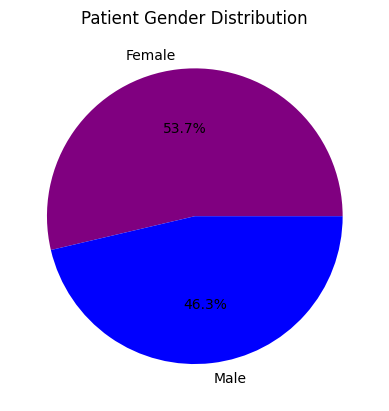

In [54]:
plt.pie(data['Sex'].value_counts(), 
labels=['Female', 'Male'], colors=['purple', 'blue'], autopct='%1.1f%%')
plt.title('Patient Gender Distribution')
plt.show()

Checking the rise in positive cases according to dates

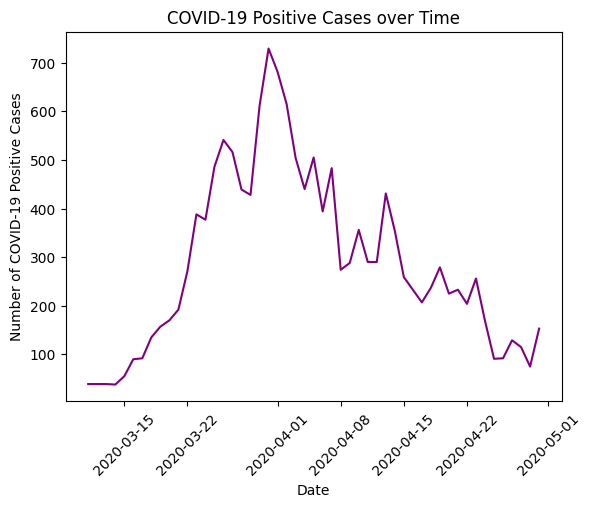

In [55]:
date_counts = data[data['Corona']=='positive'].groupby('Test_date').size().reset_index(name='counts')
plt.plot(date_counts['Test_date'], date_counts['counts'], color='purple')
plt.xlabel('Date')
plt.ylabel('Number of COVID-19 Positive Cases')
plt.title('COVID-19 Positive Cases over Time')
plt.xticks(rotation=45)
plt.show()

percentage of positive indivisuals in this data set

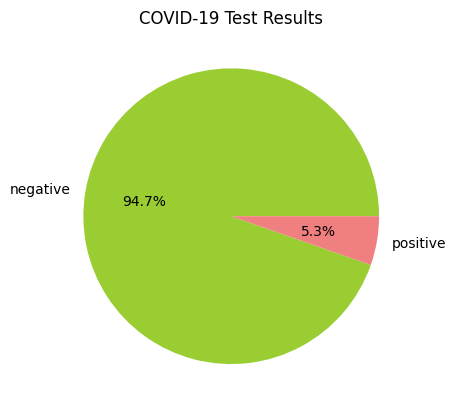

In [56]:
corona_counts = data['Corona'].value_counts()
plt.pie(corona_counts, labels=corona_counts.index, autopct='%1.1f%%', colors=['yellowgreen', 'lightcoral'])
plt.title('COVID-19 Test Results')
plt.show()

checking corona counts by gender

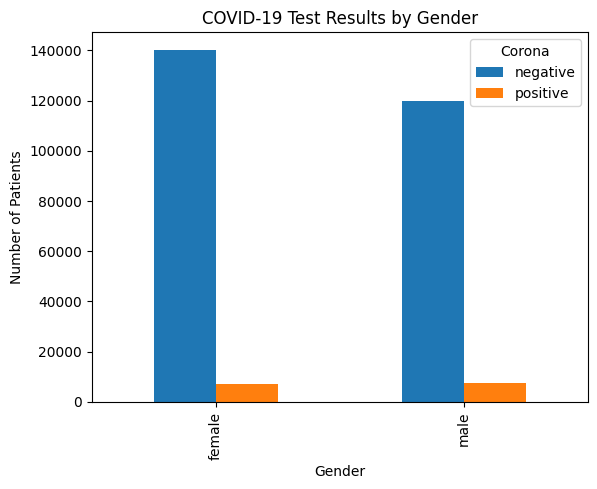

In [57]:
gender_corona_counts = data.groupby(['Sex', 'Corona']).size().unstack(fill_value=0)
gender_corona_counts.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.title('COVID-19 Test Results by Gender')
plt.show()


checking corona relation with known_contact column

<Axes: xlabel='Known_contact', ylabel='count'>

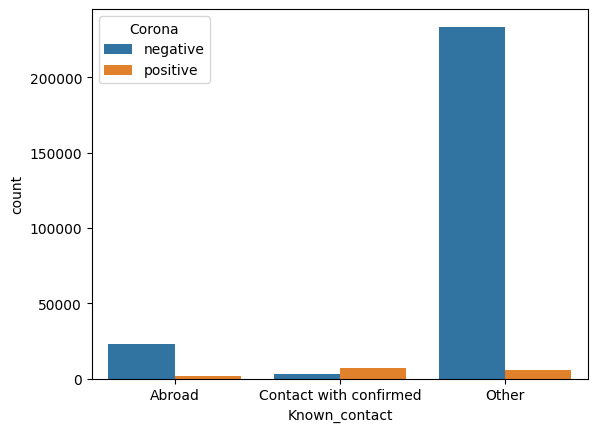

In [58]:
sns.countplot(x='Known_contact', hue='Corona', data=data)

checking the strongs symptoms that may help us to classify with the corona positive indivisuals

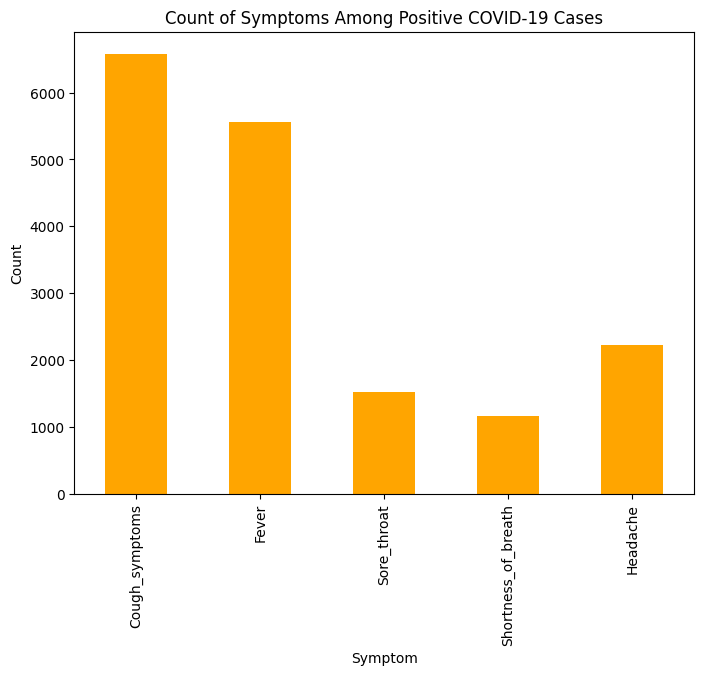

In [59]:
symptom_rows = data[data[['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache']].any(axis=1)]
positive_symptom_rows = symptom_rows[symptom_rows['Corona'] == 'positive']
symptom_counts = positive_symptom_rows[['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache']].sum()

fig, ax = plt.subplots(figsize=(8,6))
symptom_counts.plot(kind='bar', color='orange', ax=ax)
ax.set_xlabel('Symptom')
ax.set_ylabel('Count')
ax.set_title('Count of Symptoms Among Positive COVID-19 Cases')
plt.show()


checking the symptoms that may help distinguish between the positive and negative indivisuals

<ipython-input-60-d3302e647772>:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  symptom_counts = data.iloc[:,1:7].sum()


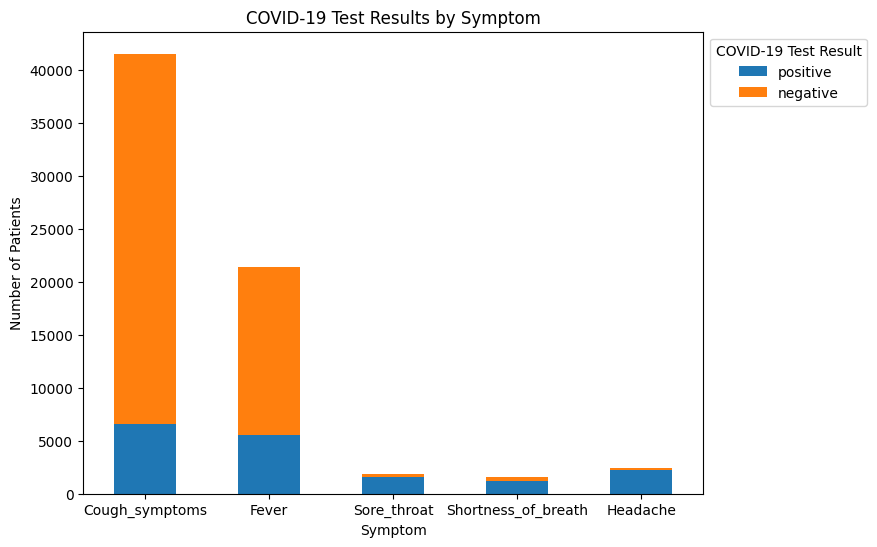

In [60]:
symptom_counts = data.iloc[:,1:7].sum()
symptom_corona_counts = data.groupby(['Corona'])[symptom_counts.index].sum().T
symptom_corona_counts['Total'] = symptom_corona_counts.sum(axis=1)
symptom_corona_counts['Positive Proportion'] = symptom_corona_counts['positive'] / symptom_corona_counts['Total']

fig, ax = plt.subplots(figsize=(8,6))
symptom_corona_counts[['positive', 'negative']].plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Symptom')
ax.set_ylabel('Number of Patients')
ax.set_title('COVID-19 Test Results by Symptom')
plt.xticks(rotation=0)
plt.legend(title='COVID-19 Test Result', loc='upper left', bbox_to_anchor=(1.0, 1))
plt.show()


checking the Distribution of Test Dates for Positive COVID-19 Cases

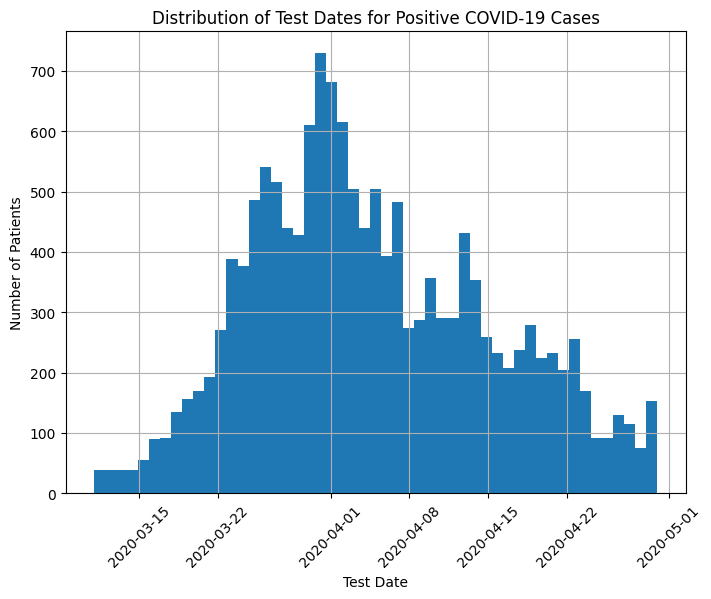

In [61]:
fig, ax = plt.subplots(figsize=(8,6))
data[data['Corona']=='positive']['Test_date'].hist(ax=ax, bins=51)
ax.set_xlabel('Test Date')
ax.set_ylabel('Number of Patients')
ax.set_title('Distribution of Test Dates for Positive COVID-19 Cases')
plt.xticks(rotation=45)
plt.show()

Checking the Distribution of Test Dates for negative COVID-19 Cases

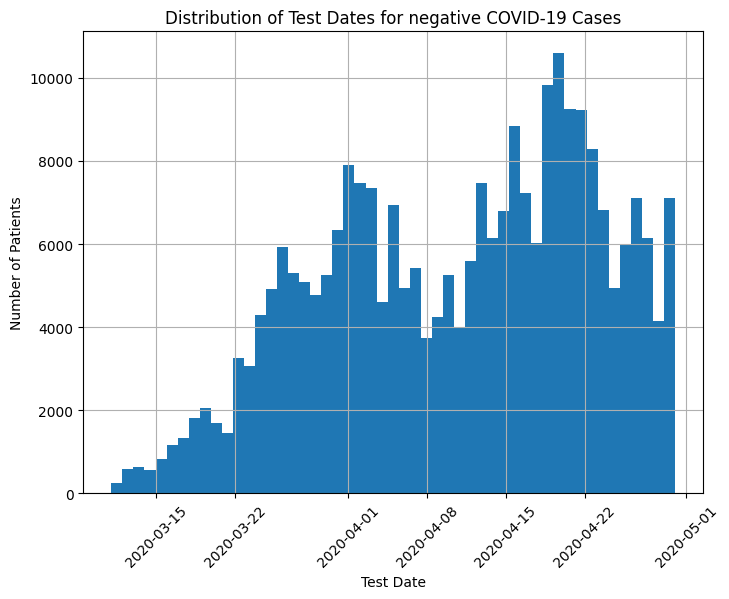

In [62]:
fig, ax = plt.subplots(figsize=(8,6))
data[data['Corona']=='negative']['Test_date'].hist(ax=ax, bins=51)
ax.set_xlabel('Test Date')
ax.set_ylabel('Number of Patients')
ax.set_title('Distribution of Test Dates for negative COVID-19 Cases')
plt.xticks(rotation=45)
plt.show()

checking the positive and negative cases according to test dates

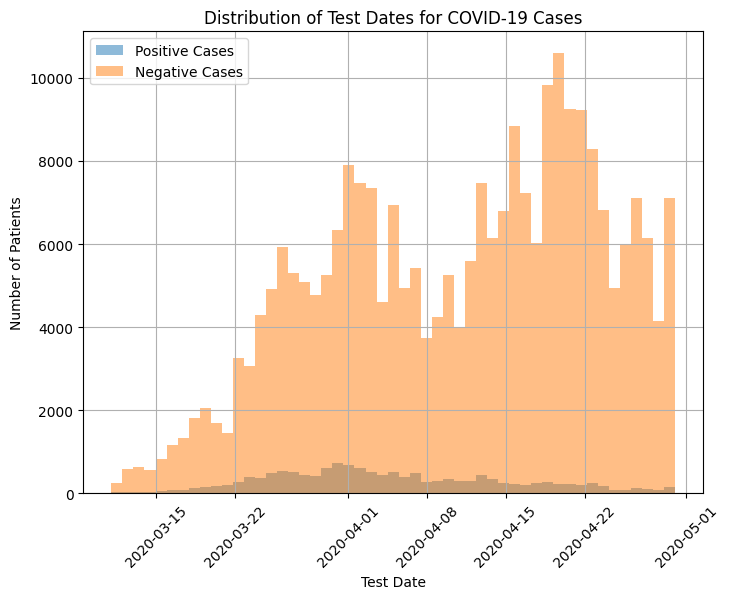

In [63]:
fig, ax = plt.subplots(figsize=(8,6))
data[data['Corona']=='positive']['Test_date'].hist(ax=ax, bins=51, alpha=0.5, label='Positive Cases')
data[data['Corona']=='negative']['Test_date'].hist(ax=ax, bins=51, alpha=0.5, label='Negative Cases')
ax.set_xlabel('Test Date')
ax.set_ylabel('Number of Patients')
ax.set_title('Distribution of Test Dates for COVID-19 Cases')
plt.xticks(rotation=45)
ax.legend()
plt.show()

**Feature engineering**

we can drop the ind_id column 

In [64]:
data = data.drop('Ind_ID', axis=1)

the Age_60_above has 125659 out of 278594 none values so i prefer dropping the column

In [65]:
data = data.drop('Age_60_above', axis=1)

Encoding the variables

In [66]:
from sklearn.preprocessing import LabelEncoder


# Encoding boolean variables as 0 or 1
bool_cols = ["Cough_symptoms", "Fever", "Sore_throat", "Shortness_of_breath", "Headache"]
data[bool_cols] = data[bool_cols].astype(int)

# Encoding categorical variables using LabelEncoder
cat_cols = ["Corona" , "Sex" , "Known_contact"]
for col in cat_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# Check the data types of each column
print(data.dtypes)

Test_date              datetime64[ns]
Cough_symptoms                  int64
Fever                           int64
Sore_throat                     int64
Shortness_of_breath             int64
Headache                        int64
Corona                          int64
Sex                             int64
Known_contact                   int64
dtype: object


In [67]:
data.head()

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Sex,Known_contact
0,2020-03-11,1,0,1,0,0,0,0,0
1,2020-03-11,0,1,0,0,0,1,0,0
2,2020-03-11,0,1,0,0,0,1,0,0
3,2020-03-11,1,0,0,0,0,0,0,0
4,2020-03-11,1,0,0,0,0,0,0,1


Checking the co-relation

In [68]:
data.corr()

<ipython-input-68-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Sex,Known_contact
Cough_symptoms,1.000000,0.453797,0.115613,0.106330,0.116730,0.196763,0.032681,-0.571655
Fever,0.453797,1.000000,0.122233,0.125840,0.169774,0.266633,0.032937,-0.348229
Sore_throat,0.115613,0.122233,1.000000,0.195181,0.323343,0.278462,-0.016578,-0.088699
Shortness_of_breath,0.106330,0.125840,0.195181,1.000000,0.202082,0.233417,-0.013875,-0.074619
Headache,0.116730,0.169774,0.323343,0.202082,1.000000,0.367324,-0.002297,-0.091871
Corona,0.196763,0.266633,0.278462,0.233417,0.367324,1.000000,0.022713,-0.211913
Sex,0.032681,0.032937,-0.016578,-0.013875,-0.002297,0.022713,1.000000,-0.027036
Known_contact,-0.571655,-0.348229,-0.088699,-0.074619,-0.091871,-0.211913,-0.027036,1.000000


<ipython-input-69-7eed9bfd49a4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap='coolwarm', annot=True)


<Axes: >

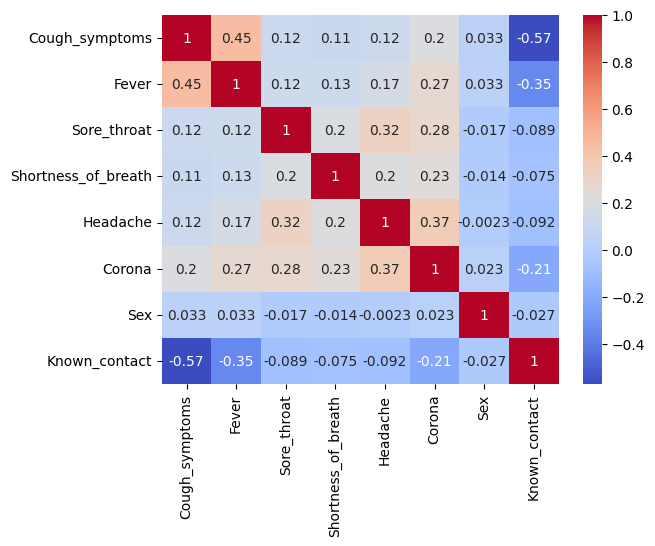

In [69]:
sns.heatmap(data.corr(), cmap='coolwarm', annot=True)

To predict the 'Corona' column, we can perform feature selection by dropping columns that have low correlation with the 'Corona' column. From the correlation output provided, we can see that the 'Sex' column has a very low correlation with the 'Corona' column, so we can drop it from our features.

We should also consider dropping the 'Known_contact' column, as it has a negative correlation with the 'Corona' column, which might suggest that it is not a strong predictor of Corona.

In [70]:
data = data.drop(['Known_contact', 'Sex'], axis=1)

In [71]:
data.shape

(274702, 7)

so , here is the encoded data 

In [72]:
data.head()

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona
0,2020-03-11,1,0,1,0,0,0
1,2020-03-11,0,1,0,0,0,1
2,2020-03-11,0,1,0,0,0,1
3,2020-03-11,1,0,0,0,0,0
4,2020-03-11,1,0,0,0,0,0


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274702 entries, 0 to 278847
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Test_date            274702 non-null  datetime64[ns]
 1   Cough_symptoms       274702 non-null  int64         
 2   Fever                274702 non-null  int64         
 3   Sore_throat          274702 non-null  int64         
 4   Shortness_of_breath  274702 non-null  int64         
 5   Headache             274702 non-null  int64         
 6   Corona               274702 non-null  int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 16.8 MB


**using SMOTE technique to handle the ombalanced dataset** 

In [74]:
X = data.drop(['Corona' , 'Test_date'],axis='columns')
y = data['Corona']

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 score:", f1)

Accuracy: 0.9580277024444404
Precision: 0.8443960826985855
F1 score: 0.4022809745982375


In [77]:
y.value_counts()

0    260008
1     14694
Name: Corona, dtype: int64

In [78]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X, y = smote.fit_resample(X, y)

y.value_counts()

0    260008
1    260008
Name: Corona, dtype: int64

In [79]:
X.shape , y.shape

((520016, 5), (520016,))

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

Accuracy: 0.7446540517672398
Precision: 0.8096628940002434
F1 Score: 0.7147077465166994


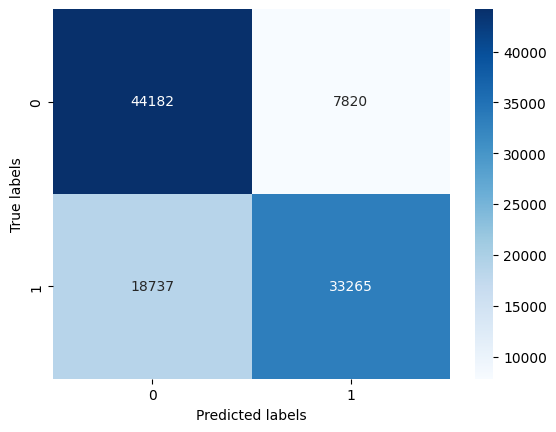

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Train the model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Test the model
y_pred = clf.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 Score:", f1)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()
